# Schrödinger equation: quantum wells

Let's consider the atomic units (a.u.) with $\hbar = m = 1$, such that our Schrödinger equation reads

$$\Big[-\dfrac{1}{2}\dfrac{\partial^2}{\partial x^2} + V(x)\Big] \psi(x) = E \psi(x)$$

Under this notation, energies, distances and time are expressed in units of:

- Energy in units of Hartree, or 2 Rydbergs: $E_H = 2R_y = 27.211386245988$ eV
- Distances in units of Bohr: $a_0 = 0.529177210903$ Å
- Time in units of $T = \frac{\hbar}{2R_y} = 2.4188843265857 \times 10^{-5}$ ps

## Finite differences

Let's define a matrix representation for $H$ in the basis of discrete sites.

Consider these Taylor expansion for $\Delta x \approx 0$:

$$\psi(x+\Delta x) \approx \psi(x) + \Delta x \; \psi'(x) + \dfrac{\Delta x^2}{2} \psi''(x) + \dfrac{\Delta x^3}{3!} \psi'''(x) + \mathcal{O}(\Delta x^4)$$

$$\psi(x-\Delta x) \approx \psi(x) - \Delta x \; \psi'(x) + \dfrac{\Delta x^2}{2} \psi''(x) - \dfrac{\Delta x^3}{3!} \psi'''(x) + \mathcal{O}(\Delta x^4)$$

If we add these two, the $\psi'(x)$ term cancel and we can solve for $\psi''(x)$ to get

$$\psi''(x) \approx \dfrac{1}{\Delta x^2}\Big[ \psi(x-\Delta x) - 2\psi(x) + \psi(x+\Delta x) \Big]$$

Discretizing $x \rightarrow x_n = x_0 + n \Delta x$ and $\psi(x) \rightarrow \psi(x_n) \equiv \psi_n$, it becomes

$$\psi''_n \approx \dfrac{1}{\Delta x^2}\Big[ \psi_{n-1} - 2\psi_n + \psi_{n+1} \Big]$$

## Applying it to the Schrödinger equation

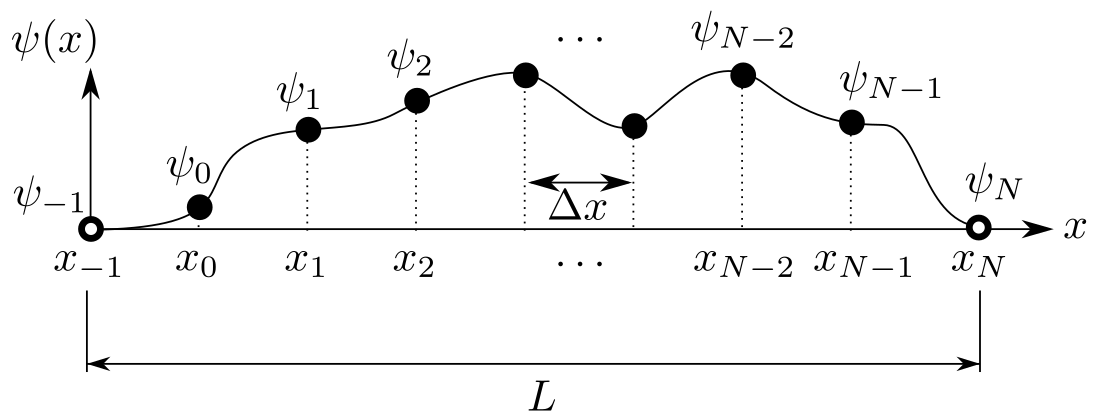

The figure above draws our choices of coordinates and sizes.

Notices that the points $x_{-1}$ and $x_N$ are emphasized, since there we'll apply the **boundary conditions**.

The Schrödinger equation in discrete form becomes:

$$ -\dfrac{1}{2\Delta x^2}\Big[ \psi_{n-1} - 2\psi_n + \psi_{n+1} \Big] + V_n \psi_n = E \psi_n$$

### Open boundary conditions

Let's assume that at the boundaries the wave-function vanish, thus:

$$ \psi_{-1} = \psi_N = 0$$

For $n=0$, $n=1$ and $n=2$, the discrete equations reads as

$$ n=0 \rightarrow -\dfrac{1}{2\Delta x^2}\Big[ 0 - 2\psi_0 + \psi_{1} \Big] + V_0 \psi_0 = E \psi_0$$

$$ n=1 \rightarrow -\dfrac{1}{2\Delta x^2}\Big[ \psi_{0} - 2\psi_1 + \psi_{2} \Big] + V_1 \psi_1 = E \psi_1$$

$$ n=2 \rightarrow -\dfrac{1}{2\Delta x^2}\Big[ \psi_{1} - 2\psi_2 + \psi_{3} \Big] + V_2 \psi_2 = E \psi_2$$

$$ \cdots $$

$$ n=N-2 \rightarrow -\dfrac{1}{2\Delta x^2}\Big[ \psi_{N-3} - 2\psi_{N-2} + \psi_{N-1} \Big] + V_{N-2} \psi_{N-2} = E \psi_{N-2}$$

$$ n=N-1 \rightarrow -\dfrac{1}{2\Delta x^2}\Big[ \psi_{N-2} - 2\psi_{N-1} + 0 \Big] + V_{N-1} \psi_{N-1} = E \psi_{N-1}$$

**Notice the boundary conditions entering the first and last equations above.**

This set of equations take a matrix form:

$$
\left[
-\dfrac{1}{\Delta x^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & \ddots & 1 \\
0 & 0 & 1 & -2
\end{pmatrix}
+
\begin{pmatrix}
V_0 & 0 & 0 & 0 \\
0 & V_1 & 0 & 0 \\
0 & 0 & \ddots & 0 \\
0 & 0 & 0 & V_{N-1}
\end{pmatrix}
\right]
\begin{pmatrix}
\psi_0 \\ \psi_1 \\ \vdots \\ \psi_{N-1}
\end{pmatrix}
=
E
\begin{pmatrix}
\psi_0 \\ \psi_1 \\ \vdots \\ \psi_{N-1}
\end{pmatrix}
$$

Or, to summarize, the $H$ takes the matrix form

$$H =
-\dfrac{1}{\Delta x^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & \ddots & 1 \\
0 & 0 & 1 & -2
\end{pmatrix}
+
\begin{pmatrix}
V_0 & 0 & 0 & 0 \\
0 & V_1 & 0 & 0 \\
0 & 0 & \ddots & 0 \\
0 & 0 & 0 & V_{N-1}
\end{pmatrix}
$$

### Periodic boundary conditions

In this case we want to consider:

$$ \psi_{-1} = \psi_{N-1} $$

$$ \psi_{N} = \psi_{0} $$

**Question:** what changes in the matrix form of $H$ in this case?

<!-- 
$$H =
-\dfrac{1}{\Delta x^2}
\begin{pmatrix}
-2 & 1 & 0 & 1 \\
1 & -2 & 1 & 0 \\
0 & 1 & \ddots & 1 \\
1 & 0 & 1 & -2
\end{pmatrix}
+
\begin{pmatrix}
V_0 & 0 & 0 & 0 \\
0 & V_1 & 0 & 0 \\
0 & 0 & \ddots & 0 \\
0 & 0 & 0 & V_{N-1}
\end{pmatrix}
$$
 -->

## Harmonic oscillator

Always the first example... So, let's use $V(x) = \dfrac{1}{2} k x^2$. We know that the solutions are

$$E_n = \left(n+\frac{1}{2}\right)\omega, \text{ with } \omega = \sqrt{k}$$

$$\psi_n(x) = \dfrac{1}{\sqrt{2^n n!}} \left(\dfrac{\omega}{\pi}\right)^{1/4} e^{-\omega x^2/2} H_n(\sqrt{\omega} x)$$

For simplicity, let's use $k = \omega = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

### Build the array for V(x)

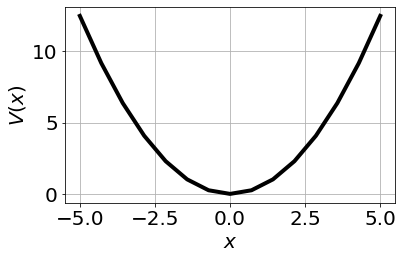

In [2]:
L = 10
N = 15
x = np.linspace(-L/2, L/2, N)
dx = x[1]-x[0]

V = 0.5*x**2

plt.plot(x, V, lw=4, c='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.grid()
plt.tight_layout()
plt.show()

### Build the kinetic operator as a tridiagonal matrix

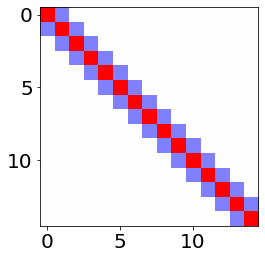

In [3]:
T = -0.5*(np.eye(N, k=-1) - 2*np.eye(N) + np.eye(N, k=+1))/dx**2

tmax = np.max(np.abs(T))

plt.imshow(T, vmin=-tmax, vmax=+tmax, cmap='bwr')
plt.tight_layout()
plt.show()

### Solve the eigenproblem and plot the results

In [4]:
H = T + np.diag(V)

en, psi = np.linalg.eigh(H)
print('First energies:', list(np.round(en[:5],1)))
print('Expected......:', [(n+0.5) for n in range(5)])

First energies: [0.5, 1.4, 2.3, 3.0, 3.6]
Expected......: [0.5, 1.5, 2.5, 3.5, 4.5]


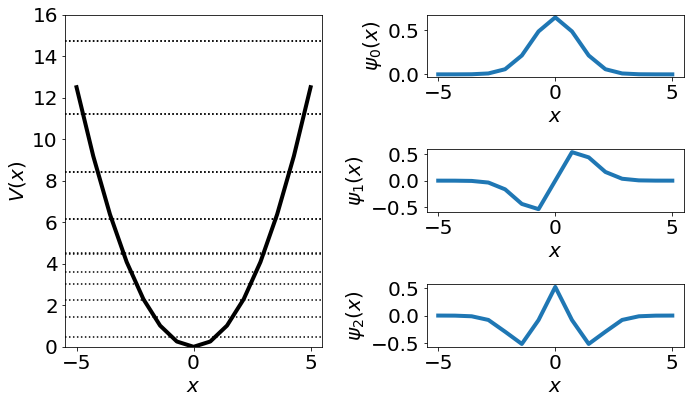

In [5]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.plot(x, V, lw=4, c='black')
for n in range(15):
    plt.axhline(en[n], c='black', ls=':')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.ylim(0, 16)

for n in range(3): # 322 324 326
    plt.subplot(322 + 2*n)
    plt.plot(x, psi[:,n], lw=4)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\psi_'+str(n)+'(x)$')

plt.tight_layout()
plt.show()

## Exercises

**(1)** How to change the code to use **periodic boundary conditions**? How does it affect the results?

**(2)** Change the code to run with 

- domain $-L/2 \leq x < L/2$ with $N = 500$ points and $L = 50$
- periodic boundary conditions
- a potential $V(x) = -V_0 [\cos(q x) + 1]$, with $V_0 = 20$, 
- use $q = (2\pi/50)n$ and vary $n$ from 1 to 25.

Questions:

a) What does $n$ represent?

b) Can you see the formation of bands? How does the eigenstates look like?